# Windowing Summary

In [1]:
# Import packages.
import analysis_functions as af
import numpy as np
import pandas as pd
# Print version numbers.
print('numpy', np.__version__)
print('pandas', pd.__version__)

numpy 1.22.3
pandas 1.4.2


In [2]:
# Load the effective sequence lengths.
esl_72kb = af.load_hap_esl_mat('arc_and_tgp', 72)
esl_748kb = af.load_hap_esl_mat('arc_and_tgp', 748)
# Intialize an archaic list.
arc_list = ['ALT', 'CHA', 'VIN', 'DEN']
# Intialize dictionaries.
arc_esl_dicc = {
    '72kb': {}, '748kb': {},
}
tgp_esl_dicc = {
    '72kb': {}, '748kb': {},
}
# For every archaic.
for i, arc in enumerate(arc_list):
    # Fill the dictionaries.
    arc_esl_dicc['72kb'][arc] = esl_72kb[0, i]
    tgp_esl_dicc['72kb'][arc] = esl_72kb[1, i]
    arc_esl_dicc['748kb'][arc] = esl_748kb[0, i]
    tgp_esl_dicc['748kb'][arc] = esl_748kb[1, i]

## 72kb Region

### Archaics

In [3]:
# Intalize a effective sequence length counter.
arc_esl_count = 0
# For every key...
for key in arc_list:
    # Print the effective sequence length.
    print(key, arc_esl_dicc['72kb'][key])
    # Update the average.
    arc_esl_count += arc_esl_dicc['72kb'][key]
# Compute the average effective sequence length.
arc_esl_avg = arc_esl_count / 4
# Print the average effective sequence length.
print('AVG', arc_esl_avg)

ALT 51780
CHA 51761
VIN 51760
DEN 51754
AVG 51763.75


In [4]:
# Load the non-overlapping windows.
arc_var_df = af.load_windows('arc', 'variant', 72)
arc_invar_df = af.load_windows('arc', 'invariant', 72)
# Concatenate the two dataframes.
arc_winds_df = pd.concat([arc_var_df, arc_invar_df])

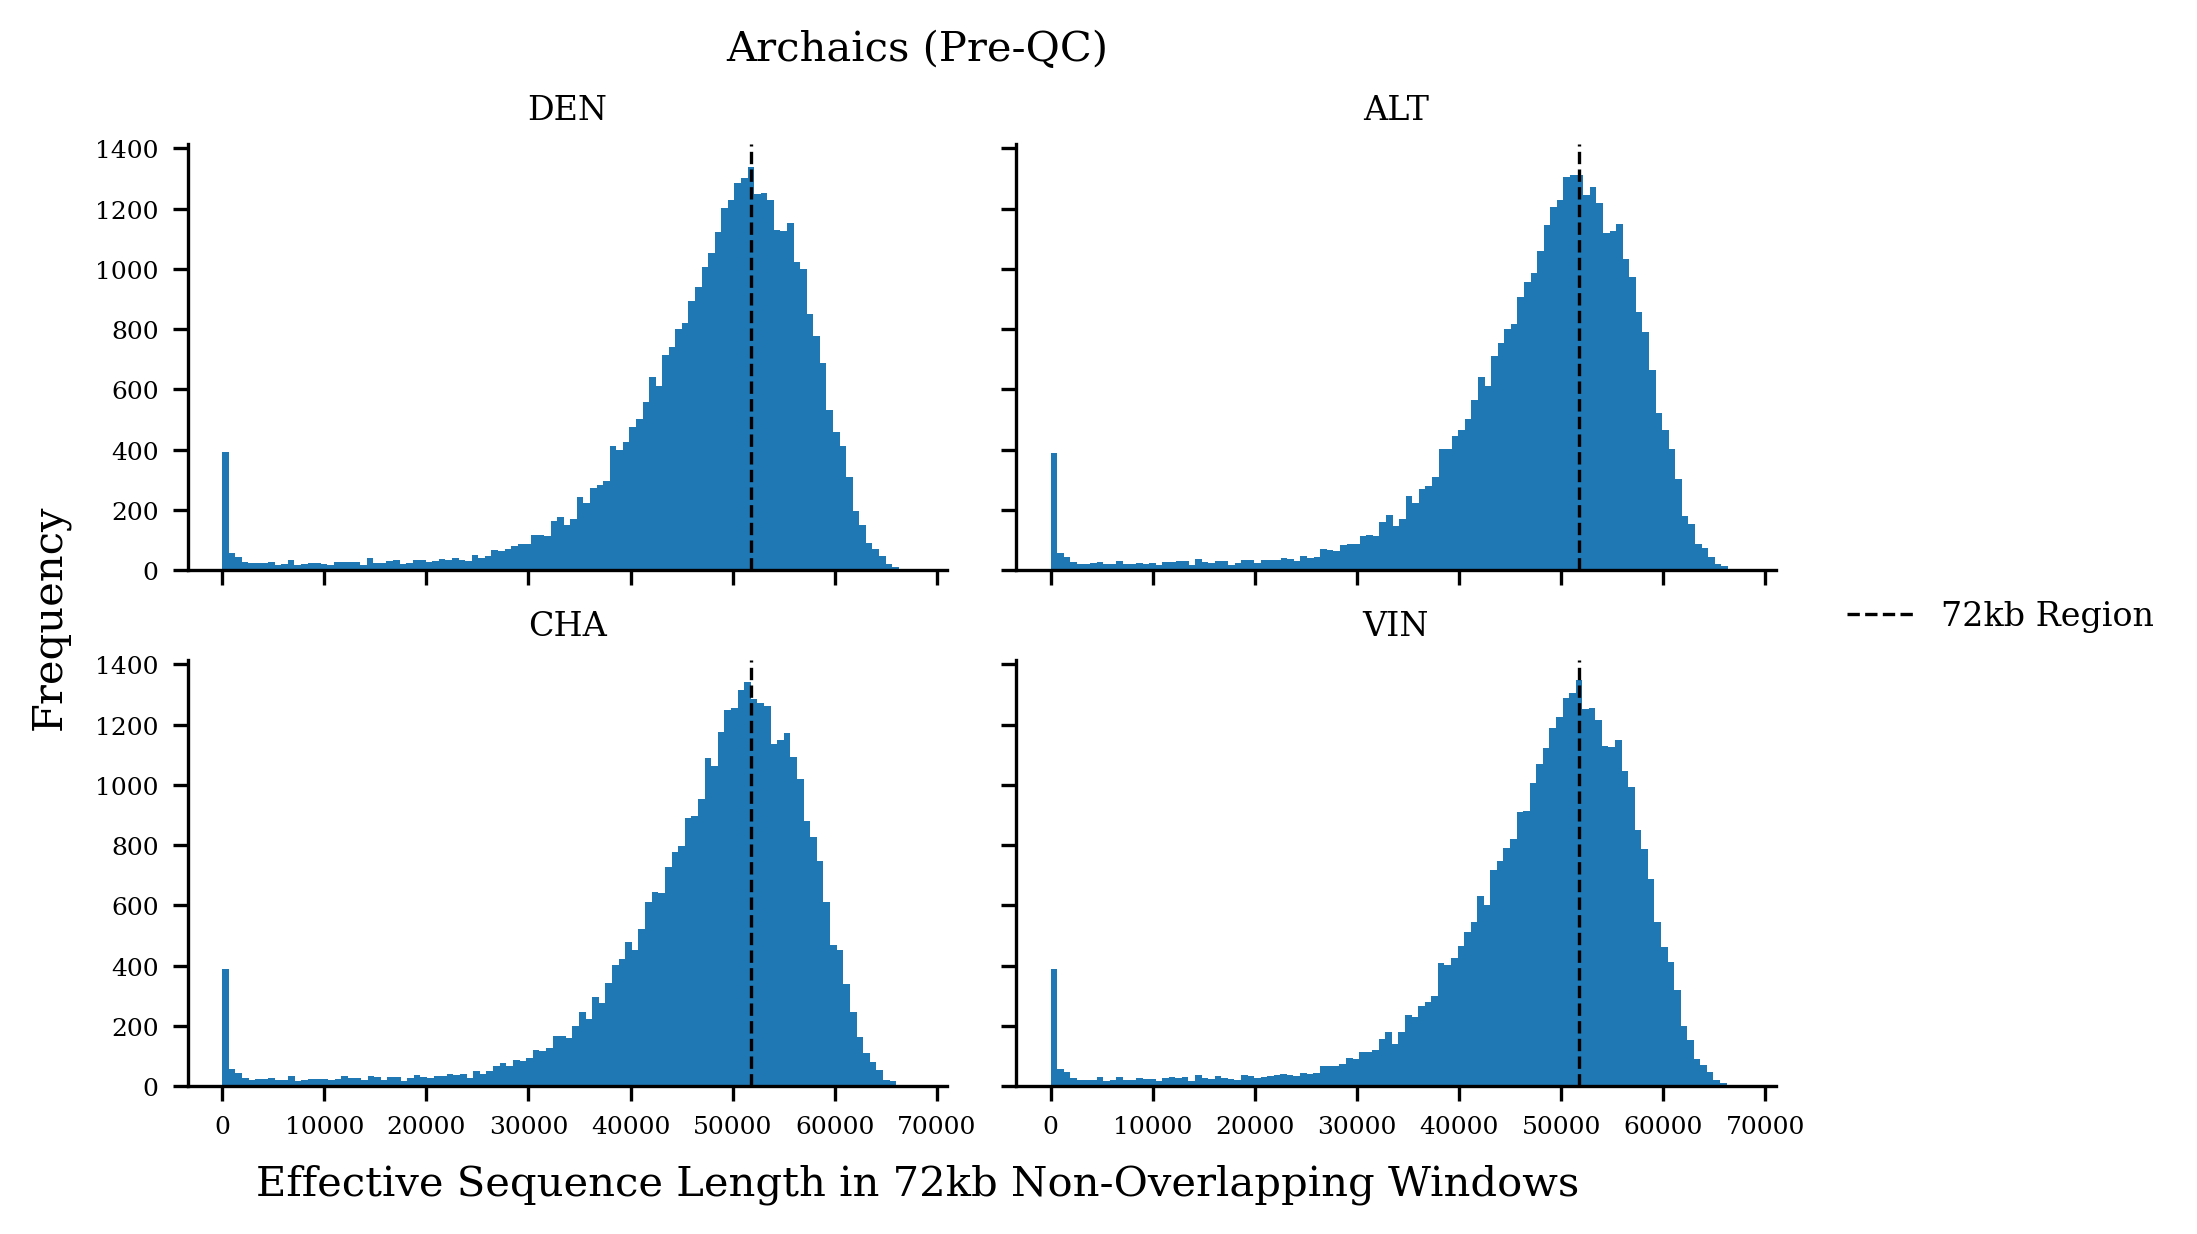

In [5]:
# Plot the effective sequence length distributions.
af.plot_arc_dist(
    arc_esl_dicc['72kb'], arc_winds_df,
    'Archaics (Pre-QC)', '72kb Region',
    'Effective Sequence Length in 72kb Non-Overlapping Windows',
)

In [6]:
# Extract the average effective sequence length per window.
arc_var_esl_winds = (arc_var_df[arc_list].to_numpy() >= 40_000).all(axis=1)
arc_invar_esl_winds = (arc_invar_df[arc_list].to_numpy() >= 40_000).all(axis=1)
# Determine the indicies that meet the esl criteria.
arc_var_esl_qc_idx = np.where(arc_var_esl_winds)[0]
arc_invar_esl_qc_idx = np.where(arc_invar_esl_winds)[0]
# Print a summary of the windows that passed QC.
print('VAR', arc_var_esl_qc_idx.size)
print('INVAR', arc_invar_esl_qc_idx.size)
print('TOTAL', (arc_var_esl_qc_idx.size + arc_invar_esl_qc_idx.size))

VAR 30880
INVAR 0
TOTAL 30880


In [7]:
# Subset out the windows that did not pass QC.
arc_var_qced_df = arc_var_df.iloc[arc_var_esl_qc_idx]

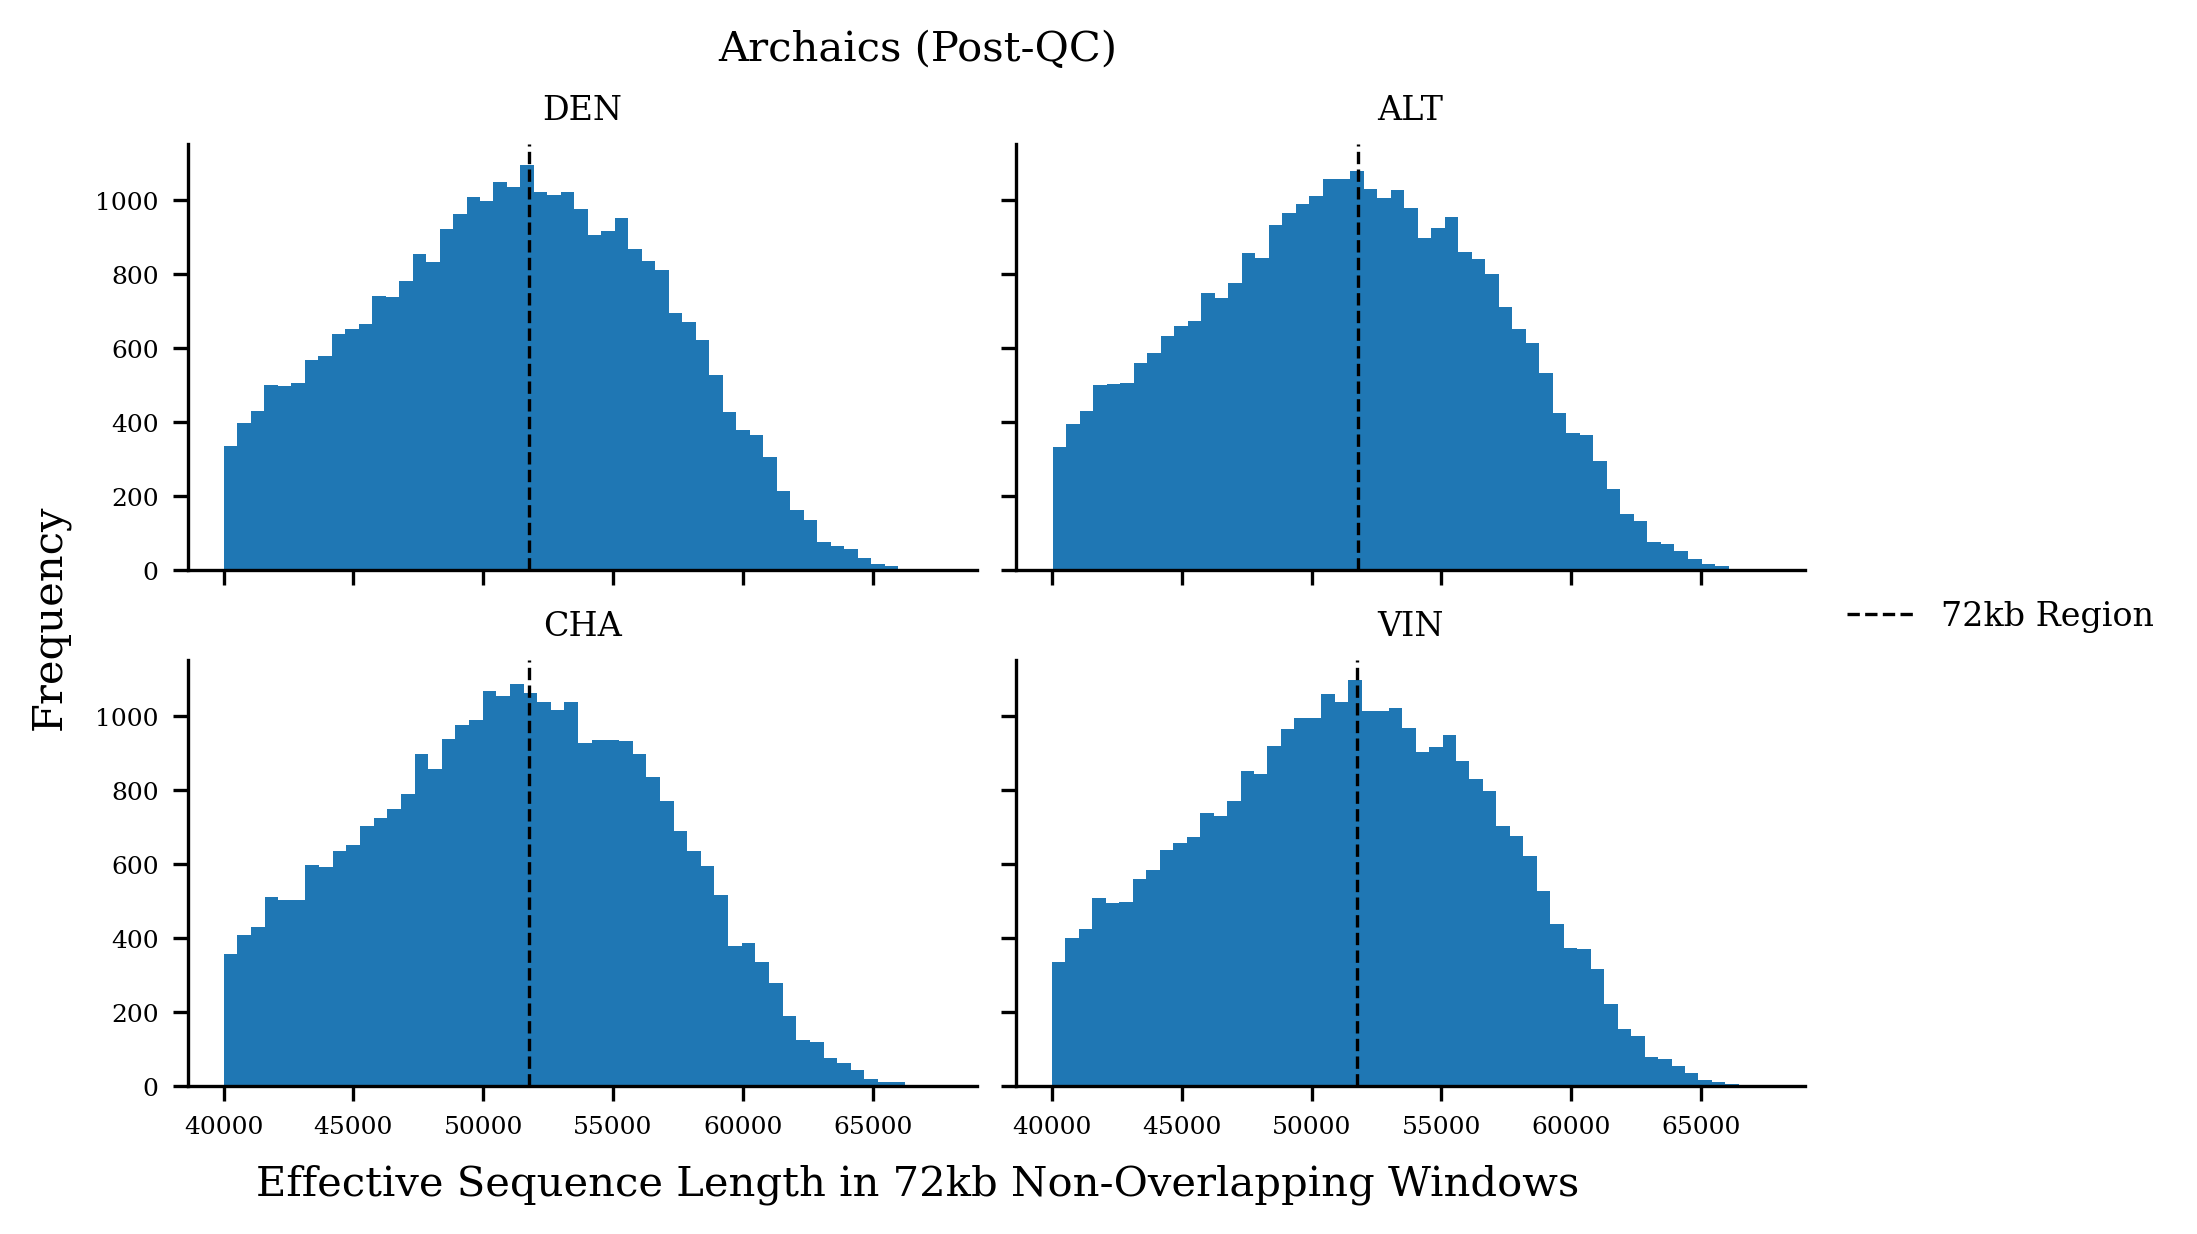

In [8]:
# Plot the effective sequence length distributions.
af.plot_arc_dist(
    arc_esl_dicc['72kb'], arc_var_qced_df,
    'Archaics (Post-QC)', '72kb Region',
    'Effective Sequence Length in 72kb Non-Overlapping Windows',
)

In [9]:
# Show a summary of the QC'ed windows.
arc_var_qced_df.groupby(['CHR'])[arc_list].agg(['count', 'mean', 'std'])

ALT                              CHA                              VIN  \
    count          mean          std count          mean          std count   
CHR                                                                           
1    2537  51208.192353  5893.917504  2537  51152.230981  5892.017461  2537   
2    2880  51737.021181  5374.522148  2880  51700.609028  5369.273862  2880   
3    2384  51244.891779  5583.198262  2384  51207.657718  5577.518333  2384   
4    2280  50474.150000  4922.965992  2280  50434.096930  4920.937003  2280   
5    2126  51239.591251  5409.269210  2126  51206.293509  5400.992557  2126   
6    2039  50760.768024  5258.633385  2039  50714.385483  5252.925684  2039   
7    1674  51173.334528  5475.666653  1674  51132.274194  5474.281655  1674   
8    1757  51287.895845  5107.128305  1757  51236.479795  5101.678762  1757   
9    1318  51165.806525  5651.348344  1318  51110.324734  5646.160310  1318   
10   1487  51782.459987  5764.120864  1487  51729.942165  5755.772448  1487   
11   1504  51789.618351  6071.331525  1504  51738.706117  6065.592983  1504   
12   1476  50633.655827  5467.900798  1476  50606.900407  5462.381344  1476   
13   1208  51628.721854  4778.175234  1208  51598.721026  4779.259199  1208   
14   1015  51004.377340  5745.391622  1015  50960.092611  5738.783712  1015   
15    878  51837.807517  5742.548346   878  51783.809795  5738.144019   878   
16    809  51062.820766  5544.562331   809  51009.160692  5541.503284   809   
17    778  50024.992288  5467.759818   778  49926.426735  5464.655782   778   
18    961  52398.536941  5242.921352   961  52360.973985  5244.811224   961   
19    299  47069.535117  5398.889704   299  46969.645485  5403.636470   299   
20    713  52621.650771  5784.357029   713  52573.803647  5776.248860   713   
21    417  51410.618705  4730.233656   417  51354.997602  4705.872544   417   
22    340  51128.908824  5764.250519   340  51060.885294  5751.811334   340   

                                 DEN                             
             mean          std count          mean          std  
CHR                                                              
1    51170.047694  5890.161797  2537  51182.188412  5896.731158  
2    51705.788194  5370.323610  2880  51718.645486  5373.770461  
3    51214.669883  5581.141159  2384  51216.063758  5594.661565  
4    50441.457456  4920.236830  2280  50458.213158  4915.212841  
5    51212.250235  5404.212122  2126  51220.881938  5407.484123  
6    50728.754782  5251.174784  2039  50735.430603  5248.340240  
7    51139.551374  5477.276770  1674  51143.250896  5478.510062  
8    51234.840068  5107.878748  1757  51263.426295  5097.738150  
9    51128.296662  5647.867048  1318  51140.651745  5655.500371  
10   51744.318090  5754.689581  1487  51759.364492  5765.080449  
11   51752.033245  6063.572068  1504  51760.132979  6076.207190  
12   50615.046070  5458.693548  1476  50635.090786  5466.193209  
13   51603.321192  4781.538823  1208  51616.620033  4767.232810  
14   50981.166502  5736.146054  1015  50994.417734  5732.593477  
15   51796.501139  5737.509328   878  51808.488610  5749.086182  
16   51013.810878  5537.471717   809  50993.229913  5562.503025  
17   49957.673522  5467.468466   778  49996.392031  5455.559004  
18   52362.011446  5248.288365   961  52378.924037  5253.662576  
19   47009.762542  5394.872364   299  47000.682274  5394.677905  
20   52582.901823  5773.025062   713  52607.719495  5769.964493  
21   51361.968825  4732.791182   417  51379.023981  4726.573374  
22   51070.370588  5748.051085   340  51070.388235  5768.786234

In [10]:
# Export the QC'ed windows indicies.
# np.savetxt(
#     f'../windowing/arc/72kb_esl_qced_nonoverlapping_variant_windows.csv.gz',
#     [arc_var_esl_qc_idx], fmt='%d', delimiter=',', newline='\n',
# )

### TGP + Archaics

In [11]:
# Intalize a effective sequence length counter.
tgp_esl_count = 0
# For every key...
for key in arc_list:
    # Print the effective sequence length.
    print(key, tgp_esl_dicc['72kb'][key])
    # Update the average.
    tgp_esl_count += tgp_esl_dicc['72kb'][key]
# Compute the average effective sequence length.
tgp_esl_avg = tgp_esl_count / 4
# Print the average effective sequence length.
print('AVG', tgp_esl_avg)

ALT 51715
CHA 51695
VIN 51695
DEN 51689
AVG 51698.5


In [12]:
# Load the non-overlapping windows.
tgp_var_df = af.load_windows('tgp', 'variant', 72)
tgp_invar_df = af.load_windows('tgp', 'invariant', 72)
# Concatenate the two dataframes.
tgp_winds_df = pd.concat([tgp_var_df, tgp_invar_df])

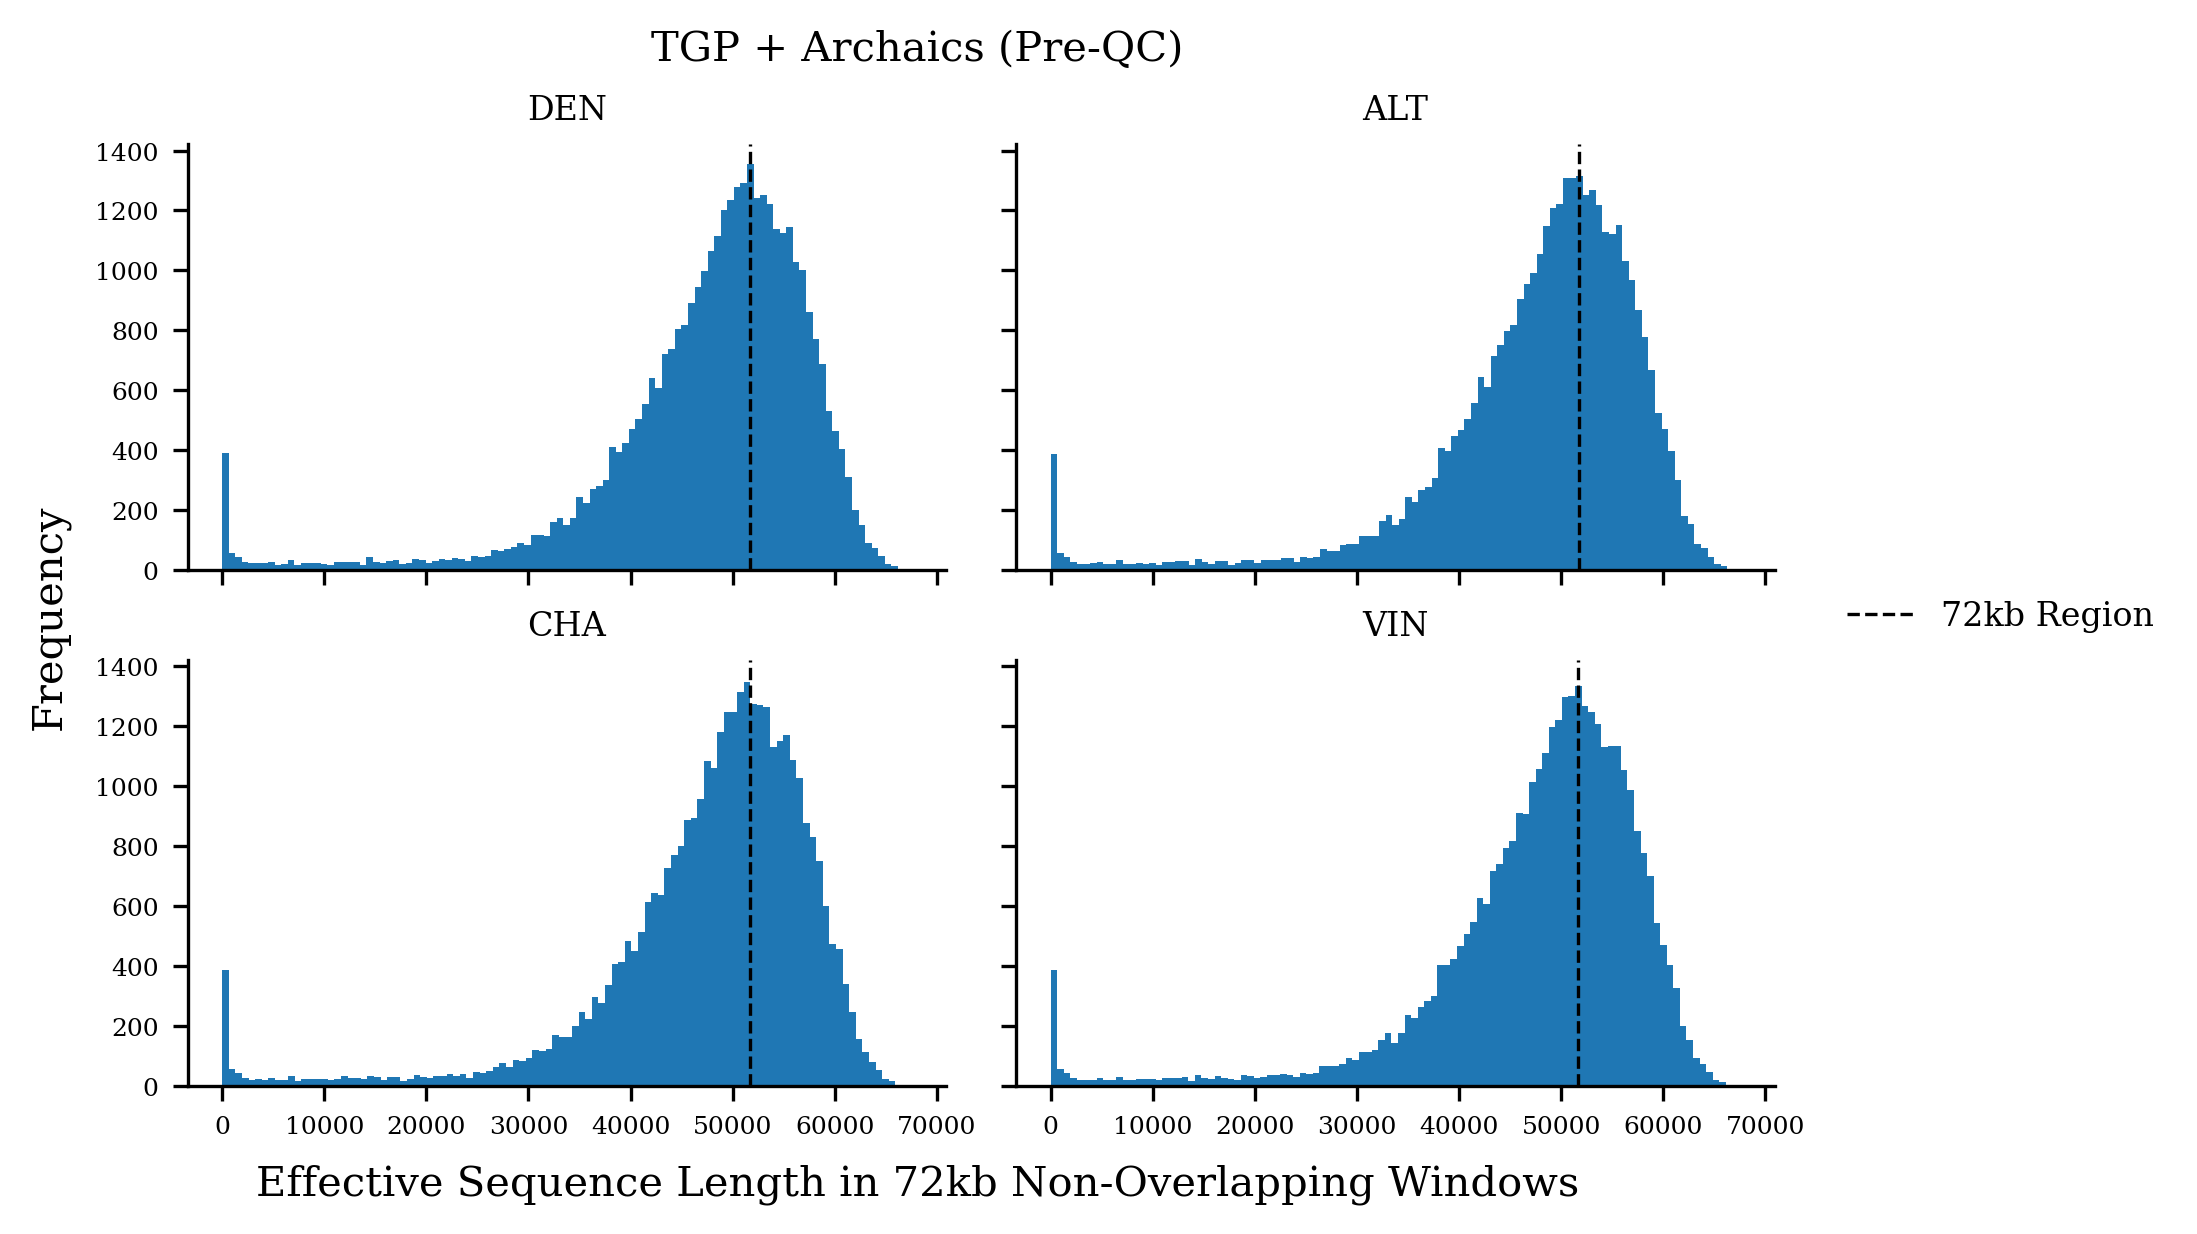

In [13]:
# Plot the effective sequence length distributions.
af.plot_arc_dist(
    tgp_esl_dicc['72kb'], tgp_winds_df,
    'TGP + Archaics (Pre-QC)', '72kb Region',
    'Effective Sequence Length in 72kb Non-Overlapping Windows',
)

In [14]:
# Extract the average effective sequence length per window.
tgp_var_esl_winds = (tgp_var_df[arc_list].to_numpy() >= 40_000).all(axis=1)
tgp_invar_esl_winds = (tgp_invar_df[arc_list].to_numpy() >= 40_000).all(axis=1)
# Determine the indicies that meet the esl criteria.
tgp_var_esl_qc_idx = np.where(tgp_var_esl_winds)[0]
tgp_invar_esl_qc_idx = np.where(tgp_invar_esl_winds)[0]
# Print a summary of the windows that passed QC.
print('VAR', tgp_var_esl_qc_idx.size)
print('INVAR', tgp_invar_esl_qc_idx.size)
print('TOTAL', (tgp_var_esl_qc_idx.size + tgp_invar_esl_qc_idx.size))

VAR 30847
INVAR 0
TOTAL 30847


In [15]:
# Subset out the windows that did not pass QC.
tgp_var_qced_df = tgp_var_df.iloc[tgp_var_esl_qc_idx]

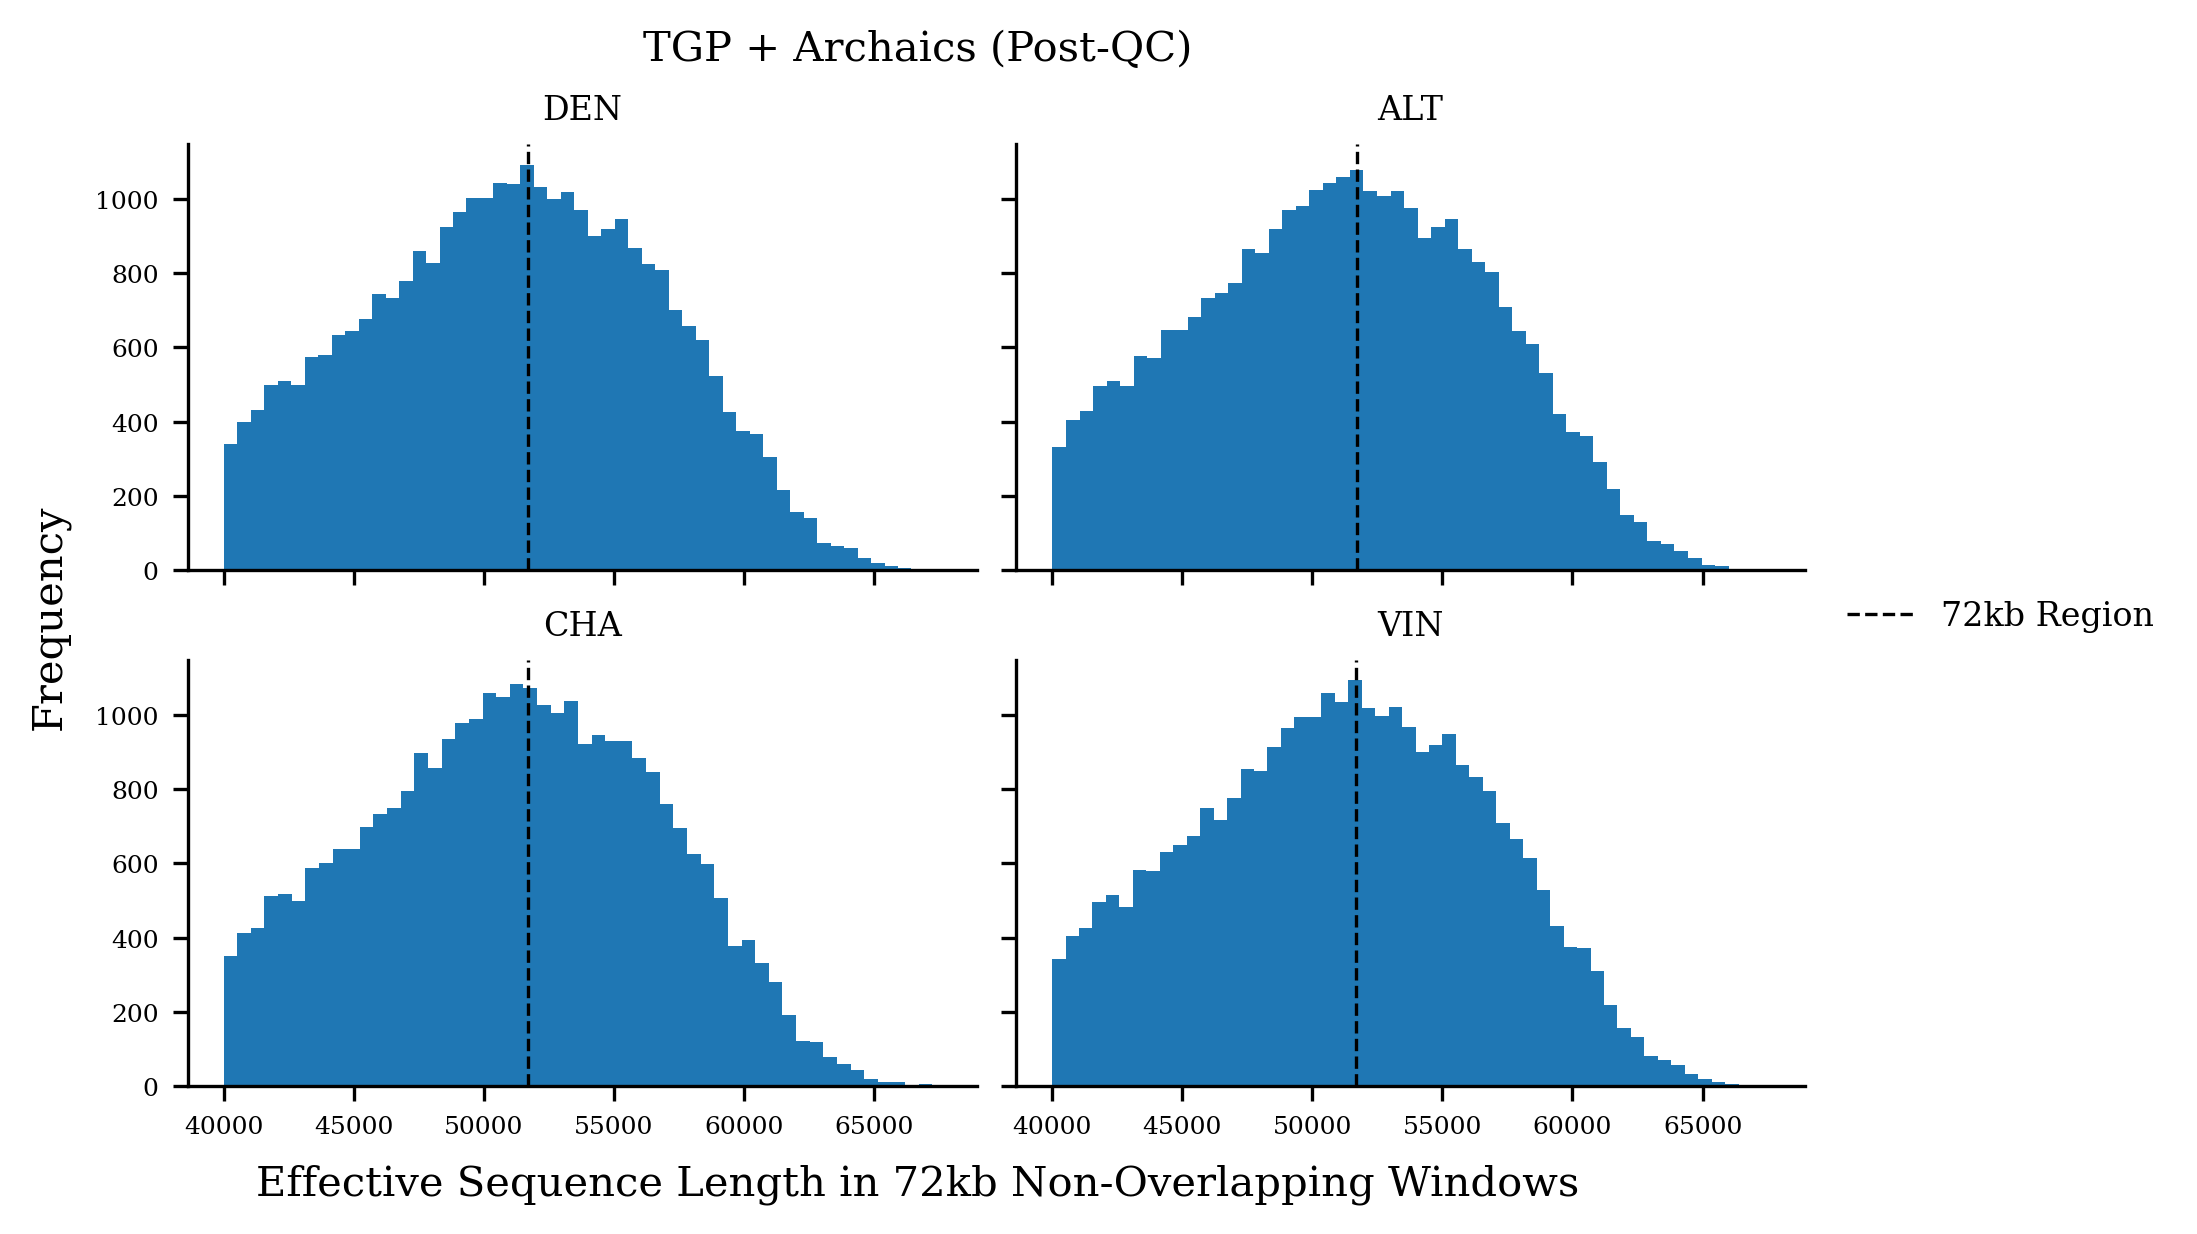

In [16]:
# Plot the effective sequence length distributions.
af.plot_arc_dist(
    tgp_esl_dicc['72kb'], tgp_var_qced_df,
    'TGP + Archaics (Post-QC)', '72kb Region',
    'Effective Sequence Length in 72kb Non-Overlapping Windows',
)

In [17]:
# Show a summary of the QC'ed windows.
tgp_var_qced_df.groupby(['CHR'])[arc_list].agg(['count', 'mean', 'std'])

ALT                              CHA                              VIN  \
    count          mean          std count          mean          std count   
CHR                                                                           
1    2535  51168.411045  5883.320912  2535  51112.562919  5881.503741  2535   
2    2878  51693.789090  5363.465544  2878  51657.497220  5358.213617  2878   
3    2382  51203.476071  5571.755183  2382  51166.364400  5566.073786  2382   
4    2277  50435.315327  4907.047018  2277  50395.384278  4905.055713  2277   
5    2126  51188.117121  5405.726230  2126  51154.919097  5397.464346  2126   
6    2038  50714.011776  5250.719838  2038  50667.747792  5245.026537  2038   
7    1672  51134.584330  5461.873303  1672  51093.653708  5460.553330  1672   
8    1754  51254.008552  5084.947599  1754  51202.690422  5079.627468  1754   
9    1316  51129.942249  5635.311806  1316  51074.594225  5630.216017  1316   
10   1487  51730.248823  5759.179873  1487  51677.905178  5750.856317  1487   
11   1500  51768.723333  6045.167935  1500  51717.897333  6039.553941  1500   
12   1474  50598.421981  5453.862078  1474  50571.770692  5448.266664  1474   
13   1208  51574.769040  4774.372727  1208  51544.905629  4775.502465  1208   
14   1012  50985.655138  5718.828414  1012  50941.422925  5712.352905  1012   
15    878  51783.874715  5737.798290   878  51729.995444  5733.402661   878   
16    809  51005.417800  5535.930963   809  50951.928307  5532.904643   809   
17    778  49975.003856  5462.487105   778  49876.637532  5459.440929   778   
18    960  52358.611458  5226.914512   960  52321.195833  5228.801969   960   
19    297  47068.629630  5384.079042   297  46969.427609  5388.334227   297   
20    711  52605.933896  5748.595652   711  52558.209564  5740.453626   711   
21    416  51378.312500  4698.107659   416  51322.788462  4673.680374   416   
22    339  51104.094395  5735.229242   339  51036.179941  5722.733966   339   

                                 DEN                             
             mean          std count          mean          std  
CHR                                                              
1    51130.382249  5879.643037  2535  51142.540039  5886.186471  
2    51662.672342  5359.296123  2878  51675.529187  5362.716666  
3    51173.344249  5569.708342  2382  51174.738875  5583.309665  
4    50402.768994  4904.391466  2277  50419.481335  4899.343494  
5    51160.876764  5400.692760  2126  51169.521167  5403.967985  
6    50682.104514  5243.309446  2038  50688.792934  5240.449966  
7    51100.909689  5463.532525  1672  51104.626794  5464.816050  
8    51201.033637  5085.886405  1754  51229.629989  5075.569700  
9    51092.556231  5631.850411  1316  51104.895137  5639.566434  
10   51692.249496  5749.762281  1487  51707.273033  5760.141110  
11   51731.233333  6037.470597  1500  51739.317333  6050.197088  
12   50579.898915  5444.636702  1474  50599.909769  5452.138366  
13   51549.480132  4777.777828  1208  51562.775662  4763.485998  
14   50962.516798  5709.574793  1012  50975.775692  5706.000367  
15   51742.683371  5732.790070   878  51754.706150  5744.375119  
16   50956.590853  5528.914069   809  50936.048208  5554.019345  
17   49907.836761  5462.258643   778  49946.570694  5450.382330  
18   52322.217708  5232.352505   960  52339.120833  5237.679665  
19   47009.033670  5380.073328   297  47000.225589  5379.637248  
20   52567.237693  5737.277776   711  52592.135021  5734.084790  
21   51329.781250  4700.884289   416  51346.800481  4694.620553  
22   51045.607670  5719.097232   339  51045.687316  5740.056213

In [18]:
# Export the QC'ed windows indicies.
# np.savetxt(
#     f'../windowing/tgp/72kb_esl_qced_nonoverlapping_variant_windows.csv.gz',
#     [tgp_var_esl_qc_idx], fmt='%d', delimiter=',', newline='\n',
# )

## 748kb Region

### Archaics

In [19]:
# Intalize a effective sequence length counter.
arc_esl_count = 0
# For every key...
for key in arc_list:
    # Print the effective sequence length.
    print(key, arc_esl_dicc['748kb'][key])
    # Update the average.
    arc_esl_count += arc_esl_dicc['748kb'][key]
# Compute the average effective sequence length.
arc_esl_avg = arc_esl_count / 4
# Print the average effective sequence length.
print('AVG', arc_esl_avg)

ALT 534720
CHA 534461
VIN 534270
DEN 534418
AVG 534467.25


In [20]:
# Load the non-overlapping windows.
arc_var_df = af.load_windows('arc', 'variant', 748)
arc_invar_df = af.load_windows('arc', 'invariant', 748)
# Concatenate the two dataframes.
arc_winds_df = pd.concat([arc_var_df, arc_invar_df])

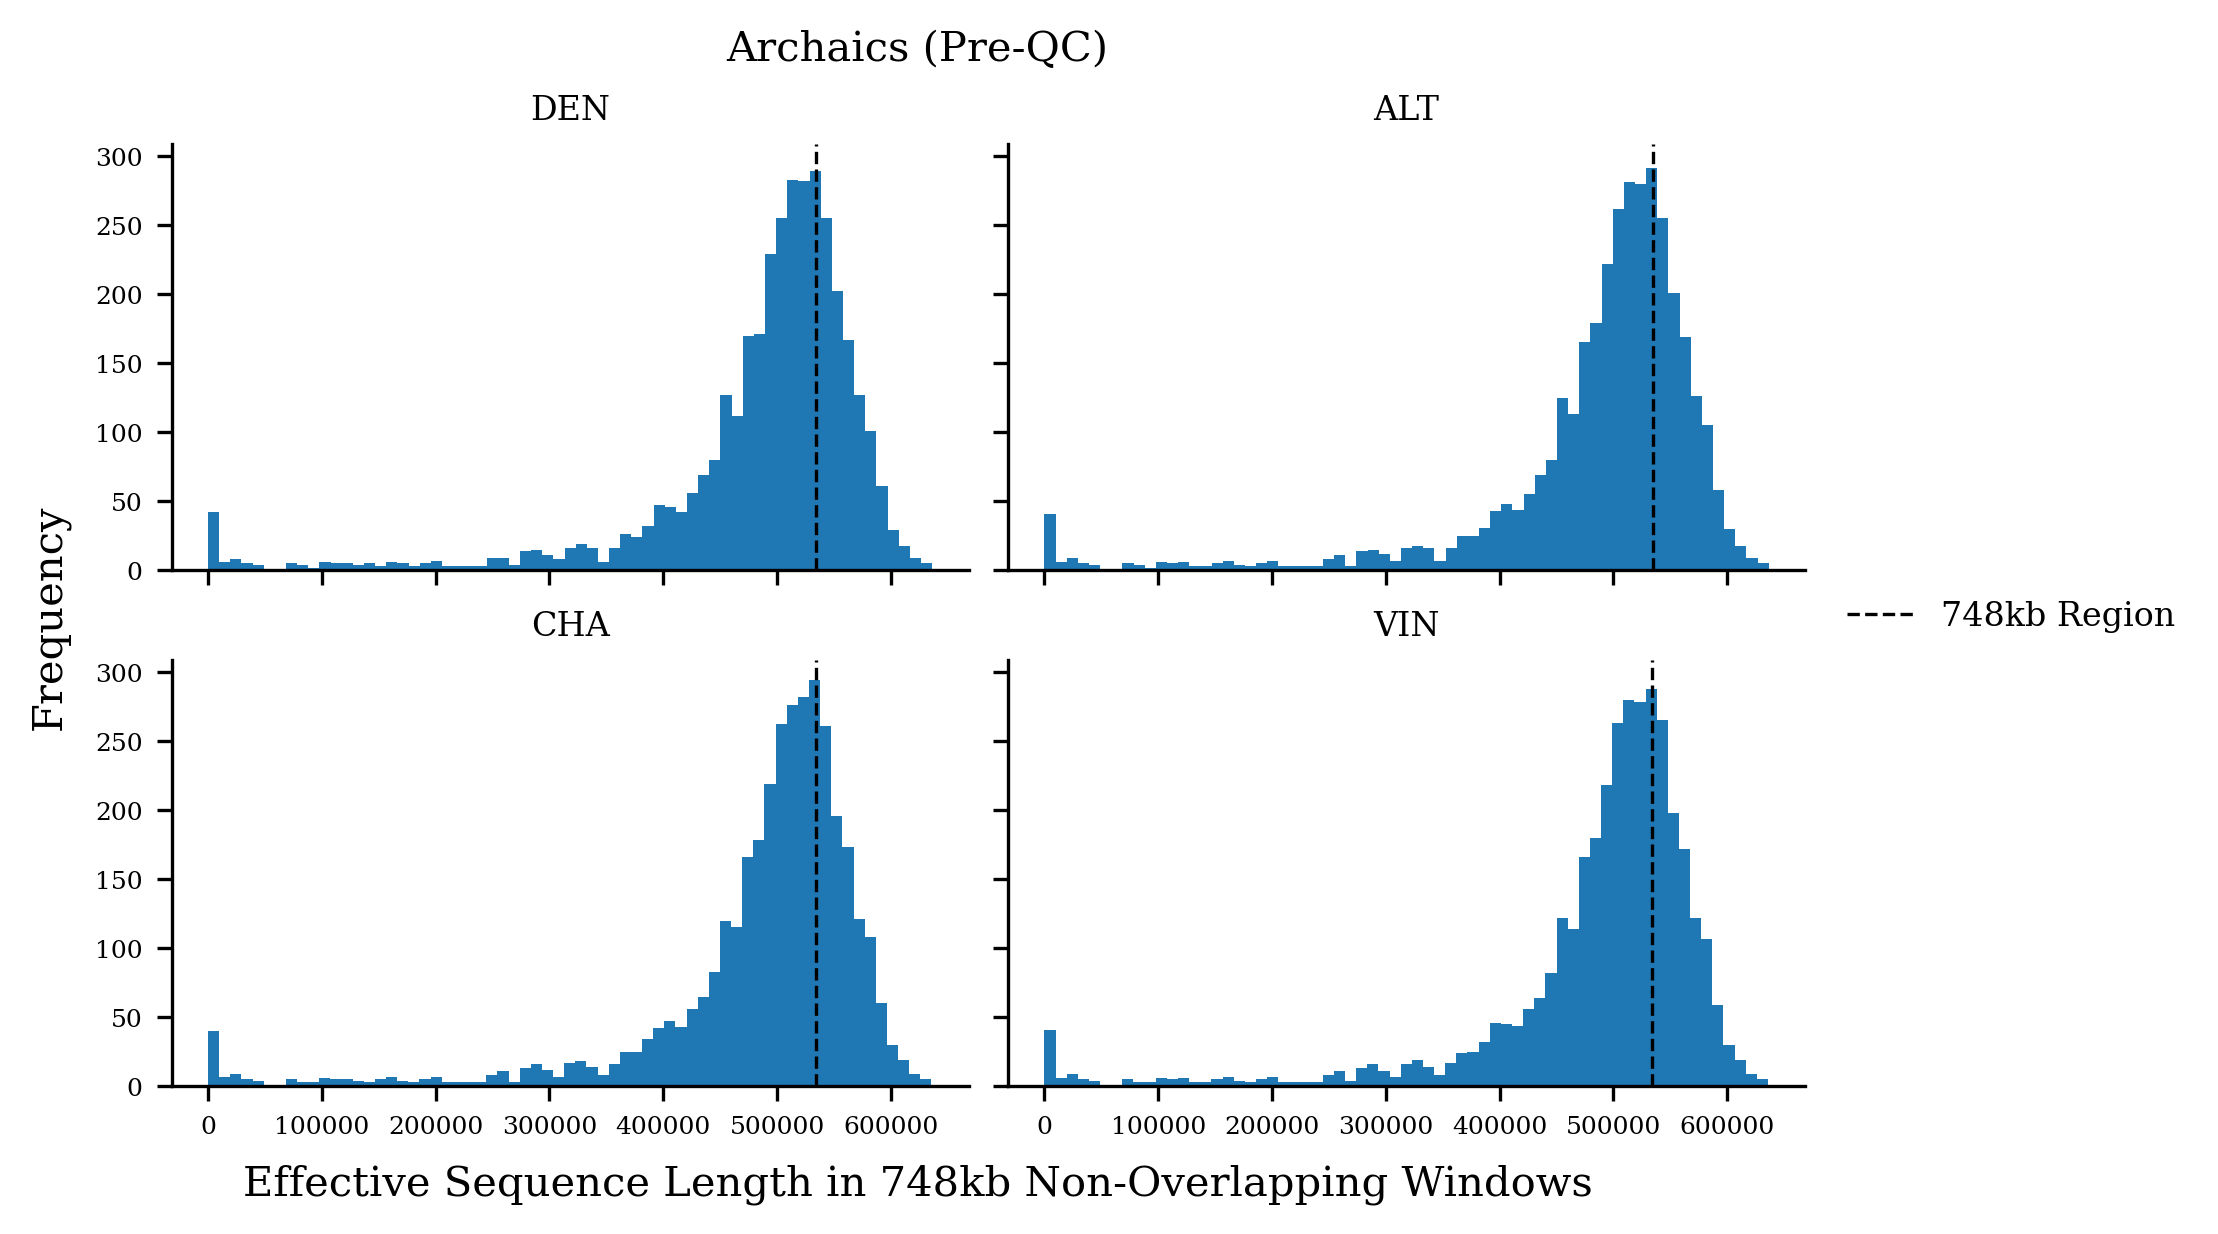

In [21]:
# Plot the effective sequence length distributions.
af.plot_arc_dist(
    arc_esl_dicc['748kb'], arc_winds_df,
    'Archaics (Pre-QC)', '748kb Region',
    'Effective Sequence Length in 748kb Non-Overlapping Windows',
)

In [22]:
# Extract the average effective sequence length per window.
arc_var_esl_winds = (arc_var_df[arc_list].to_numpy() >= 400_000).all(axis=1)
arc_invar_esl_winds = (arc_invar_df[arc_list] >= 400_000).all(axis=1)
# Determine the indicies that meet the esl criteria.
arc_var_esl_qc_idx = np.where(arc_var_esl_winds)[0]
arc_invar_esl_qc_idx = np.where(arc_invar_esl_winds)[0]
# Print a summary of the windows that passed QC.
print('VAR', arc_var_esl_qc_idx.size)
print('INVAR', arc_invar_esl_qc_idx.size)
print('TOTAL', (arc_var_esl_qc_idx.size + arc_invar_esl_qc_idx.size))

VAR 3191
INVAR 0
TOTAL 3191


In [23]:
# Subset out the windows that did not pass QC.
arc_var_qced_df = arc_var_df.iloc[arc_var_esl_qc_idx]

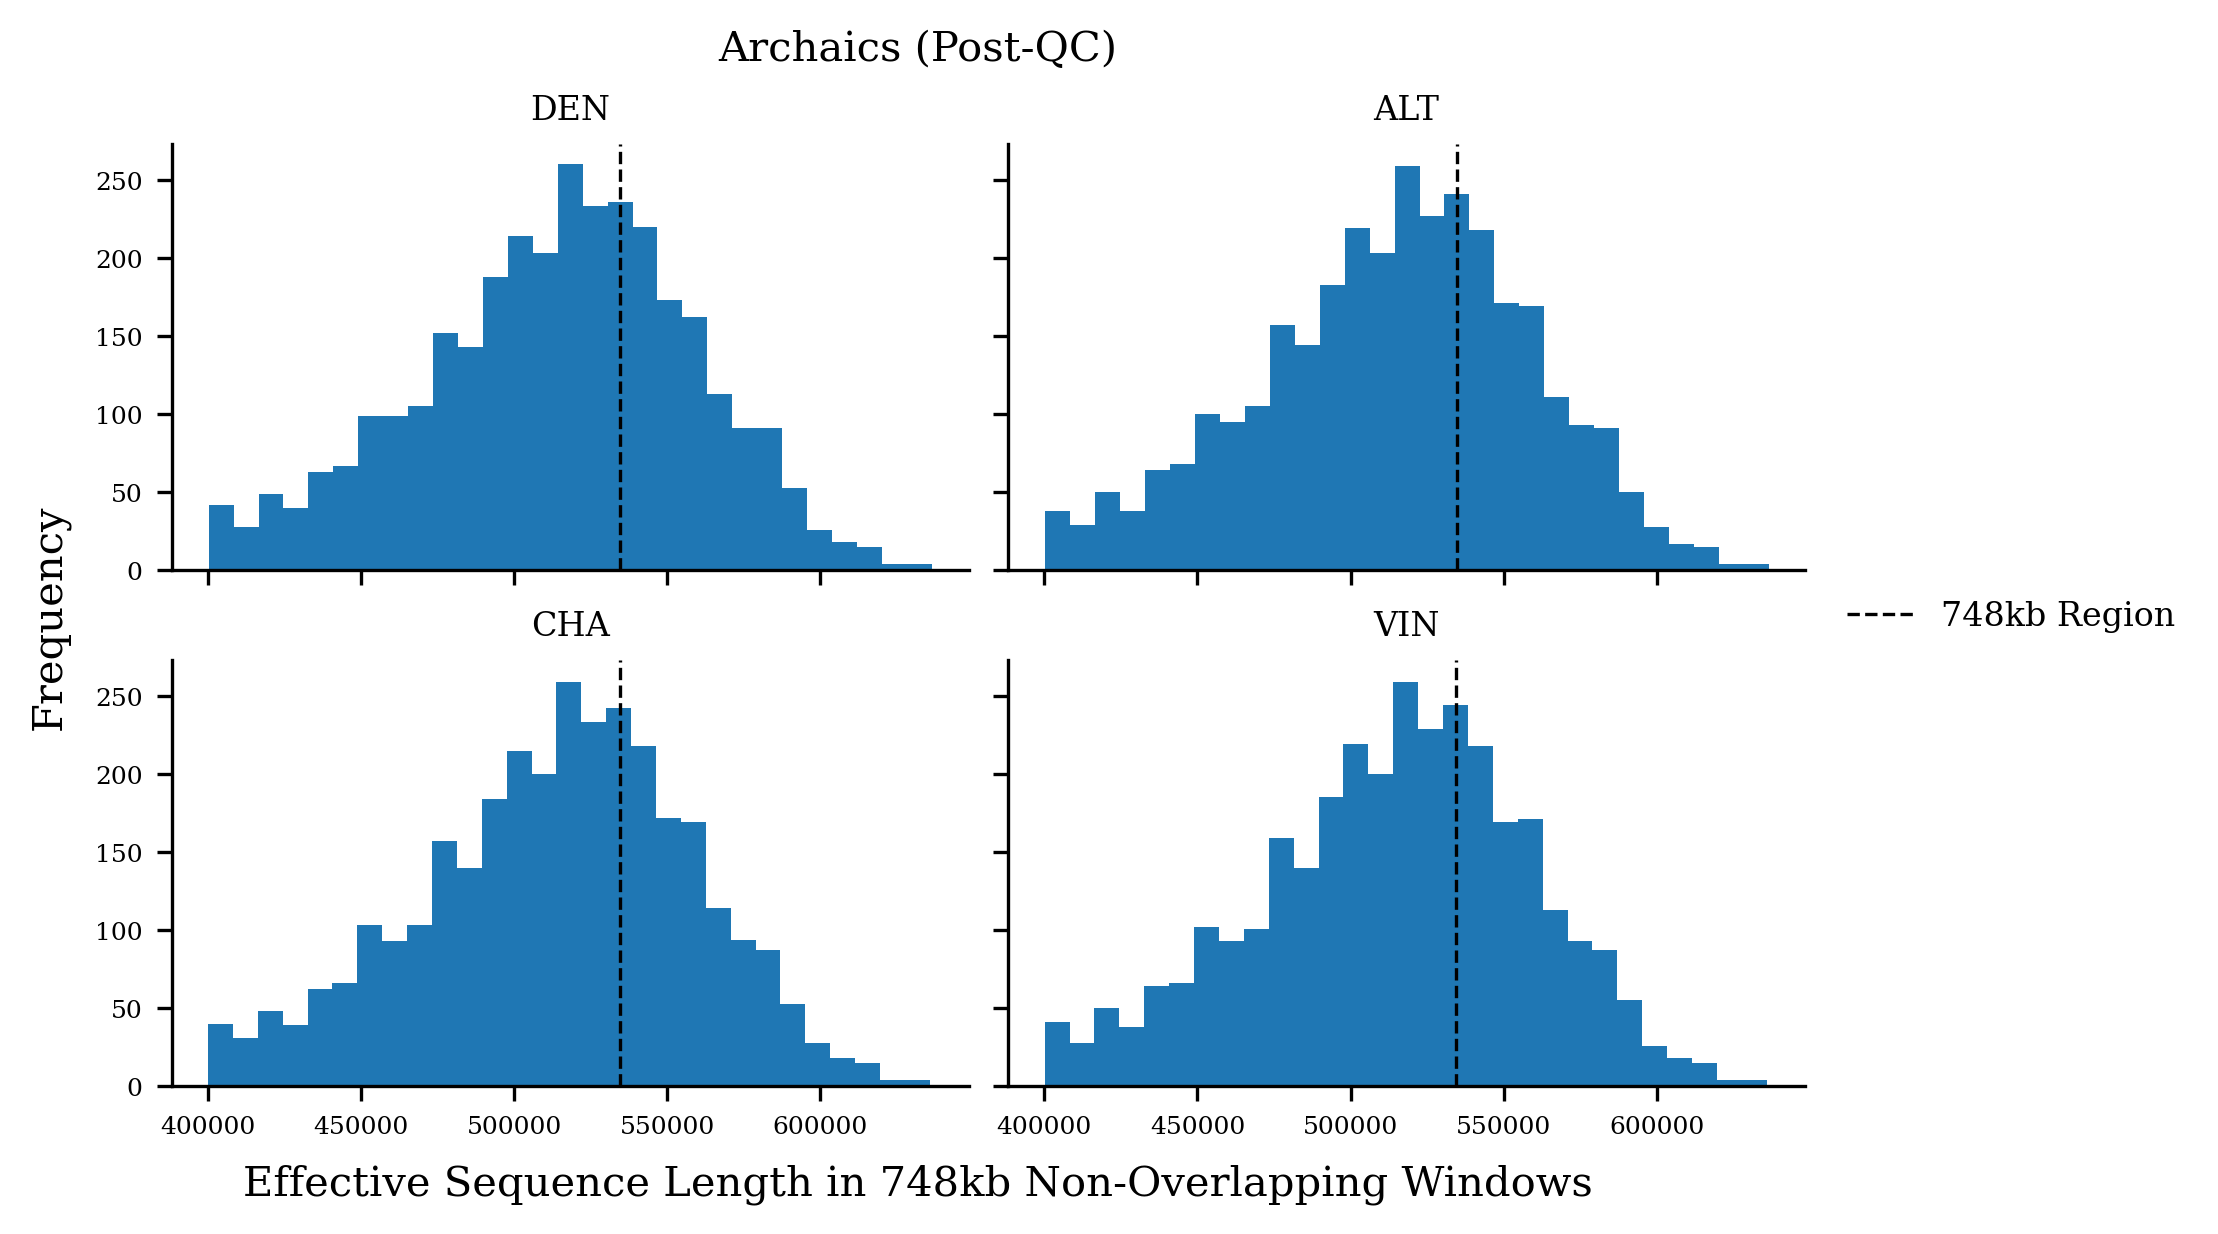

In [24]:
# Plot the effective sequence length distributions.
af.plot_arc_dist(
    arc_esl_dicc['748kb'], arc_var_qced_df,
    'Archaics (Post-QC)', '748kb Region',
    'Effective Sequence Length in 748kb Non-Overlapping Windows',
)

In [25]:
# Show a summary of the QC'ed windows.
arc_var_qced_df.groupby(['CHR'])[arc_list].agg(['count', 'mean', 'std'])

ALT                                CHA                               \
    count           mean           std count           mean           std   
CHR                                                                         
1     268  508625.436567  48576.331296   268  508081.742537  48629.618320   
2     299  520653.702341  43880.271694   299  520293.541806  43863.919299   
3     250  515941.976000  41113.338148   250  515555.540000  41112.308165   
4     240  508510.608333  35591.332209   240  508138.441667  35585.855778   
5     221  514416.013575  40891.809110   221  514067.312217  40861.447629   
6     211  511479.402844  39264.082032   211  510996.075829  39260.507596   
7     164  517464.762195  42071.377273   164  517056.091463  42120.405677   
8     181  519338.408840  38215.626464   181  518812.933702  38236.038933   
9     135  514289.866667  41210.064411   135  513698.274074  41319.261565   
10    154  516703.220779  49154.339173   154  516213.409091  49118.294025   
11    159  517187.383648  50085.728484   159  516725.572327  50096.178285   
12    158  504509.221519  45601.210231   158  504212.797468  45732.954066   
13    123  521329.804878  39097.091301   123  521020.211382  39082.642122   
14    110  508820.936364  48492.606020   110  508716.790909  48419.238017   
15     88  518265.000000  47059.165770    88  517578.215909  46992.117080   
16     81  510436.777778  52829.936772    81  509889.382716  52929.483428   
17     76  493633.407895  47805.646749    76  492783.078947  48070.499768   
18     96  534307.177083  40293.885973    96  533927.187500  40303.067968   
19     26  456945.961538  58249.003353    26  456012.769231  58493.575574   
20     76  525882.131579  51198.751178    76  525416.605263  51183.078242   
21     42  521331.523810  38149.443230    42  520750.404762  38181.286908   
22     33  504201.303030  57223.720612    33  503558.848485  57252.516851   

      VIN                                DEN                               
    count           mean           std count           mean           std  
CHR                                                                        
1     268  508250.876866  48571.145473   268  508309.888060  48735.173198  
2     299  520345.652174  43849.339644   299  520489.073579  43887.484463  
3     250  515627.740000  41117.164425   250  515315.932000  41724.753070  
4     240  508145.616667  35732.962995   240  508396.975000  35434.957597  
5     221  514162.719457  40905.648432   221  514194.312217  40841.947772  
6     211  511133.180095  39255.173351   211  511240.478673  39216.014524  
7     164  517111.670732  42115.501395   164  517216.146341  42277.153229  
8     181  518795.237569  38203.901419   181  519051.546961  38249.487813  
9     135  513912.207407  41255.401557   135  514066.029630  41221.486515  
10    154  516342.454545  49089.311453   154  516403.610390  49145.238841  
11    159  516830.490566  50042.861505   159  516952.157233  50028.217247  
12    158  504301.715190  45679.103473   158  504499.848101  45701.606222  
13    123  521066.666667  39078.859527   123  520935.674797  39085.086891  
14    110  508923.945455  48465.496940   110  509061.354545  48482.168661  
15     88  517833.693182  47061.759589    88  517986.750000  47176.260573  
16     81  509944.469136  52758.518052    81  509700.333333  53003.235469  
17     76  493188.657895  47831.665069    76  493644.671053  47605.854605  
18     96  533937.395833  40162.077358    96  534116.989583  40464.297161  
19     26  456362.961538  58279.608851    26  456356.538462  58223.723597  
20     76  525523.815789  51095.422494    76  525760.342105  51114.985945  
21     42  520833.547619  38197.346410    42  521002.452381  38298.366521  
22     33  503647.000000  57187.749947    33  503665.030303  57275.673919

In [26]:
# Export the QC'ed windows indicies.
# np.savetxt(
#     f'../windowing/arc/748kb_esl_qced_nonoverlapping_variant_windows.csv.gz',
#     [arc_var_esl_qc_idx], fmt='%d', delimiter=',', newline='\n',
# )

### TGP + Archaics

In [27]:
# Intalize a effective sequence length counter.
tgp_esl_count = 0
# For every key...
for key in arc_list:
    # Print the effective sequence length.
    print(key, tgp_esl_dicc['748kb'][key])
    # Update the average.
    tgp_esl_count += tgp_esl_dicc['748kb'][key]
# Compute the average effective sequence length.
tgp_esl_avg = tgp_esl_count / 4
# Print the average effective sequence length.
print('AVG', tgp_esl_avg)

ALT 534196
CHA 533937
VIN 533747
DEN 533895
AVG 533943.75


In [28]:
# Load the non-overlapping windows.
tgp_var_df = af.load_windows('tgp', 'variant', 748)
tgp_invar_df = af.load_windows('tgp', 'invariant', 748)
# Concatenate the two dataframes.
tgp_winds_df = pd.concat([tgp_var_df, tgp_invar_df])

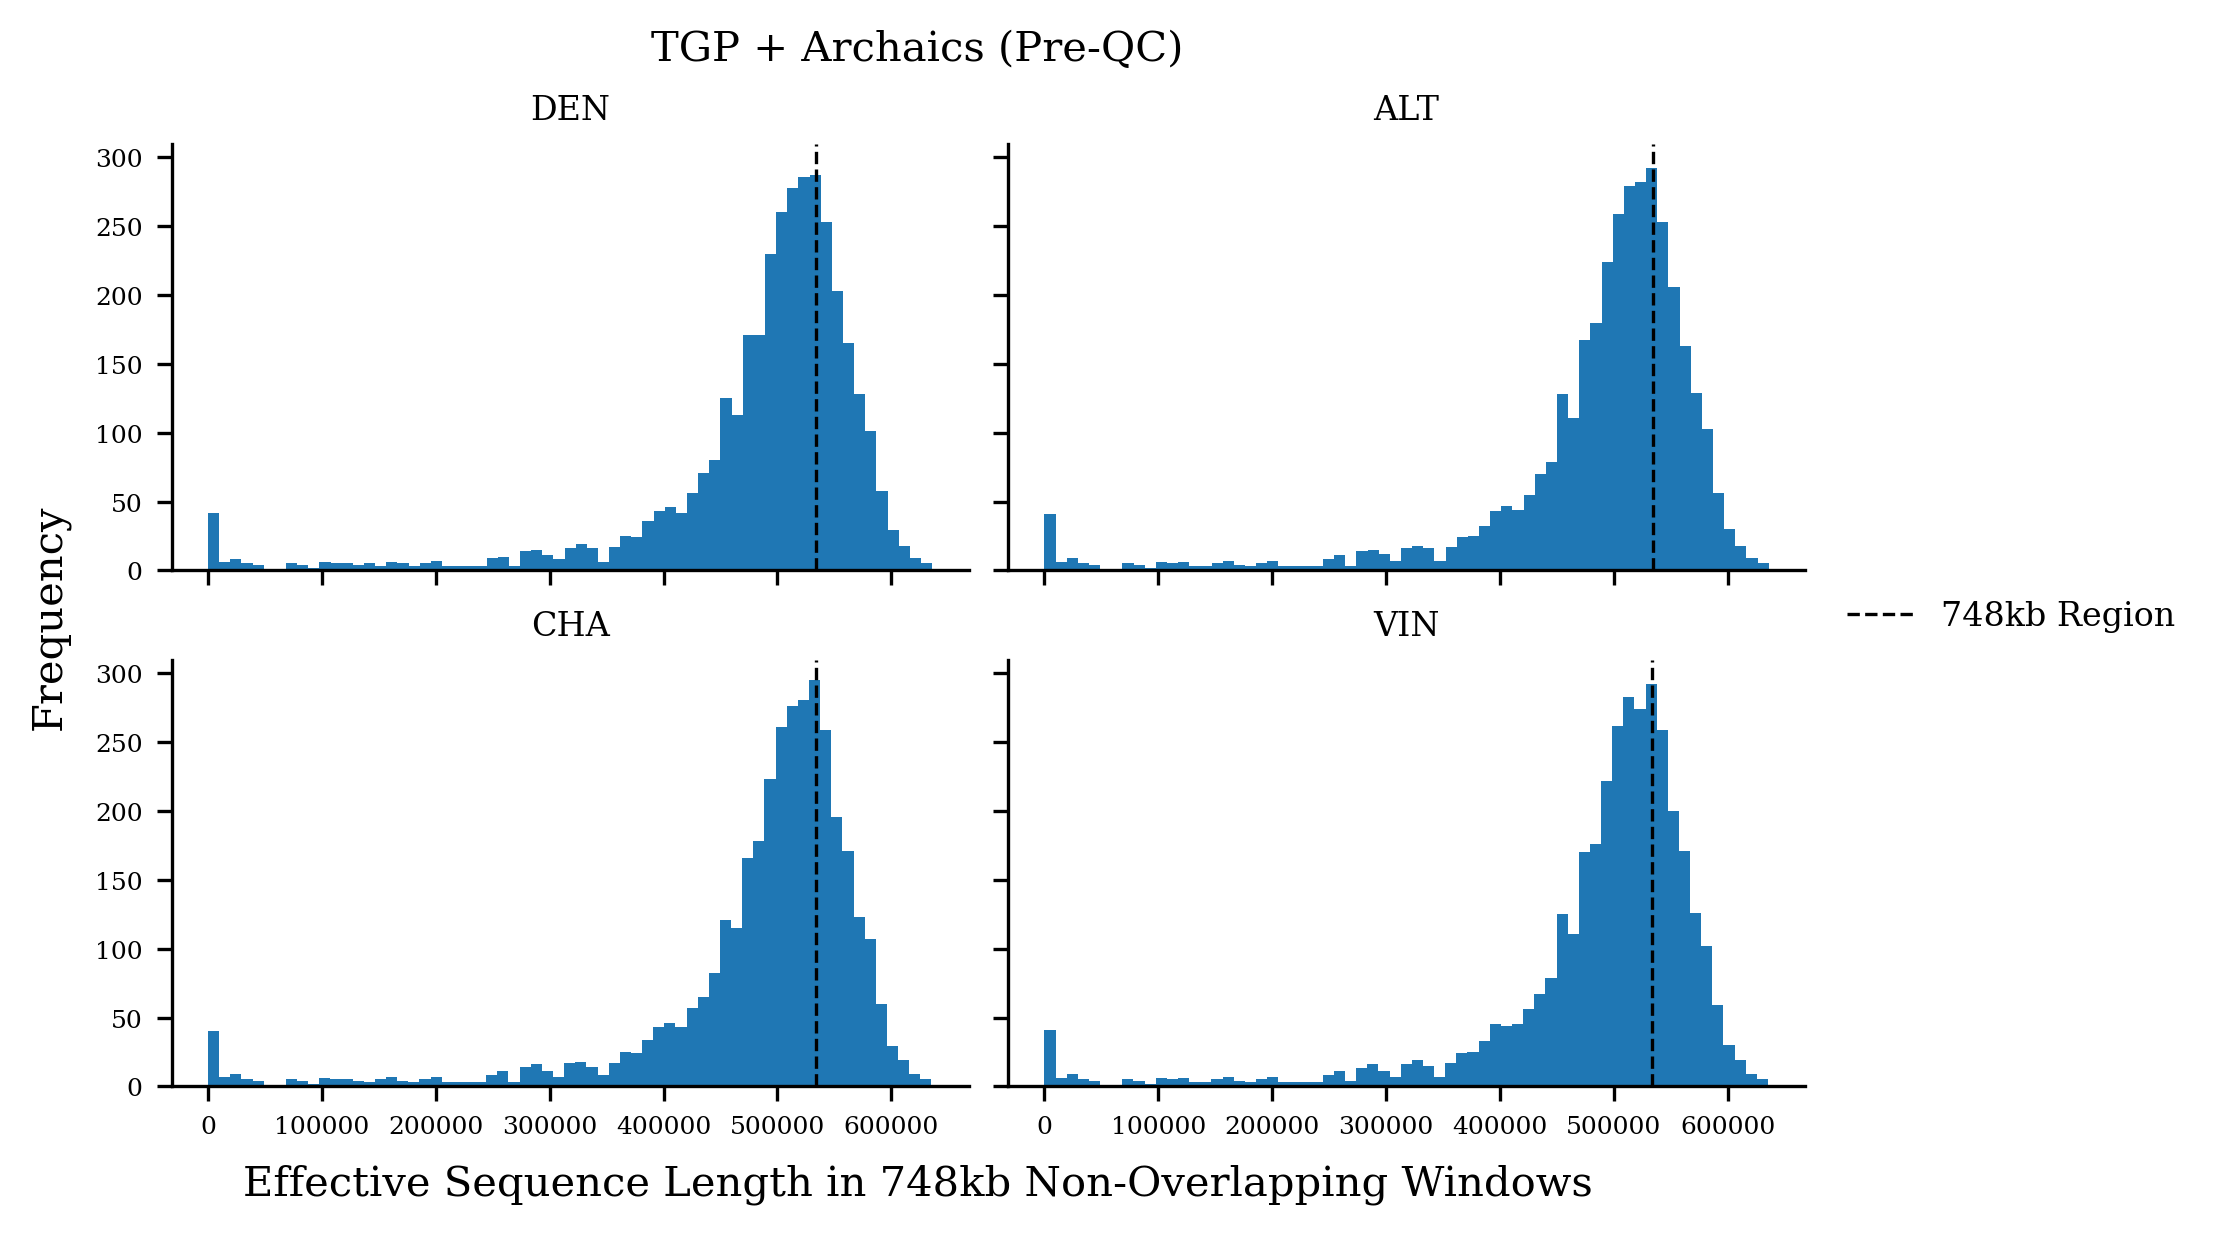

In [29]:
# Plot the effective sequence length distributions.
af.plot_arc_dist(
    tgp_esl_dicc['748kb'], tgp_winds_df,
    'TGP + Archaics (Pre-QC)', '748kb Region',
    'Effective Sequence Length in 748kb Non-Overlapping Windows',
)

In [30]:
# Extract the average effective sequence length per window.
tgp_var_esl_winds = (tgp_var_df[arc_list].to_numpy() >= 400_000).all(axis=1)
tgp_invar_esl_winds = (tgp_invar_df[arc_list].to_numpy() >= 400_000).all(axis=1)
# Determine the indicies that meet the esl criteria.
tgp_var_esl_qc_idx = np.where(tgp_var_esl_winds)[0]
tgp_invar_esl_qc_idx = np.where(tgp_invar_esl_winds)[0]
# Print a summary of the windows that passed QC.
print('VAR', tgp_var_esl_qc_idx.size)
print('INVAR', tgp_invar_esl_qc_idx.size)
print('TOTAL', (tgp_var_esl_qc_idx.size + tgp_invar_esl_qc_idx.size))

VAR 3187
INVAR 0
TOTAL 3187


In [31]:
# Subset out the windows that did not pass QC.
tgp_var_qced_df = tgp_var_df.iloc[tgp_var_esl_qc_idx]

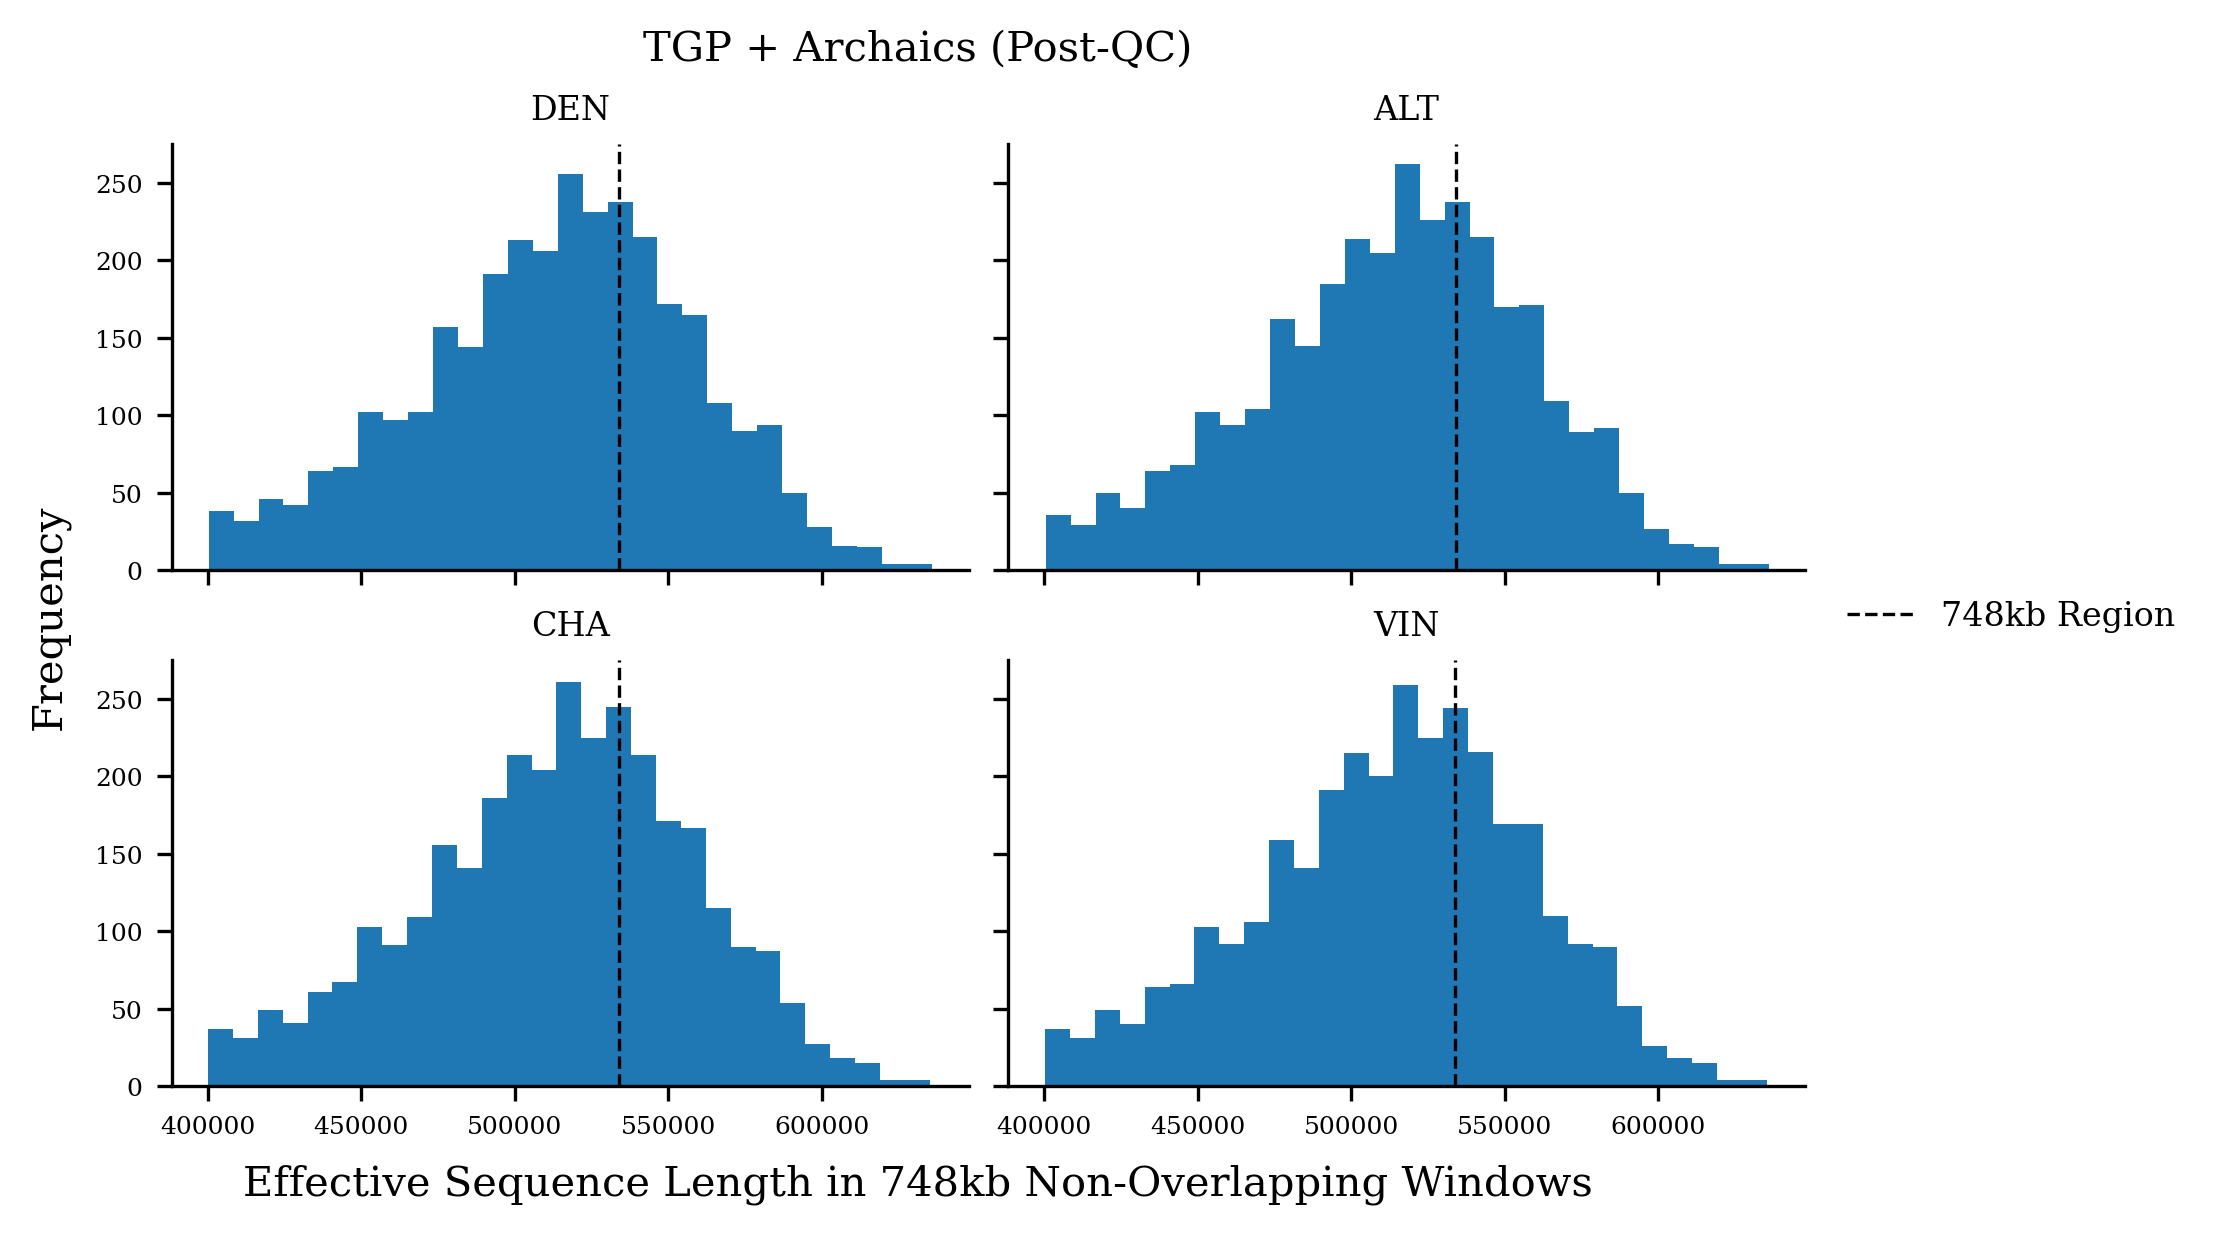

In [32]:
# Plot the effective sequence length distributions.
af.plot_arc_dist(
    tgp_esl_dicc['748kb'], tgp_var_qced_df,
    'TGP + Archaics (Post-QC)', '748kb Region',
    'Effective Sequence Length in 748kb Non-Overlapping Windows',
)

In [33]:
# Show a summary of the QC'ed windows.
tgp_var_qced_df.groupby(['CHR'])[arc_list].agg(['count', 'mean', 'std'])

ALT                                CHA                               \
    count           mean           std count           mean           std   
CHR                                                                         
1     267  508541.438202  48185.792252   267  507997.812734  48242.803228   
2     299  520137.137124  43839.893229   299  519778.183946  43823.454703   
3     250  515429.476000  41075.299022   250  515044.308000  41074.327898   
4     240  507980.304167  35553.032828   240  507609.429167  35547.771068   
5     221  513898.475113  40861.395862   221  513550.841629  40831.144053   
6     211  510952.867299  39235.708980   211  510470.786730  39232.250826   
7     164  516940.347561  42040.743118   164  516533.024390  42090.085913   
8     181  518800.226519  38152.443869   181  518276.303867  38173.148230   
9     133  515460.315789  39042.630716   133  514874.127820  39149.102981   
10    154  516180.487013  49110.577813   154  515692.370130  49074.591477   
11    159  516665.213836  50048.737177   159  516204.893082  50059.050949   
12    158  504015.544304  45560.030913   158  503719.936709  45691.168600   
13    123  520783.585366  39071.489784   123  520475.382114  39057.433649   
14    109  509296.486239  47555.951351   109  509199.963303  47465.331646   
15     88  517725.250000  47015.201957    88  517039.715909  46947.967545   
16     81  509854.000000  52738.480418    81  509308.419753  52838.100099   
17     76  493138.881579  47751.206511    76  492290.736842  48016.010515   
18     96  533769.781250  40266.915400    96  533391.156250  40276.422382   
19     26  456475.884615  58228.916330    26  455545.115385  58473.741716   
20     76  525373.302632  51137.703262    76  524908.934211  51122.321112   
21     42  520725.500000  38110.164880    42  520146.119048  38141.327554   
22     33  503639.393939  57106.363541    33  502998.030303  57134.913975   

      VIN                                DEN                               
    count           mean           std count           mean           std  
CHR                                                                        
1     267  508174.127341  48167.840573   267  508226.374532  48348.352342  
2     299  519830.377926  43809.089802   299  519973.705686  43847.118067  
3     250  515116.216000  41079.300832   250  514804.848000  41686.963320  
4     240  507616.929167  35695.104629   240  507867.925000  35398.670104  
5     221  513646.149321  40875.408261   221  513677.950226  40811.808255  
6     211  510607.786730  39226.933540   211  510715.208531  39187.731577  
7     164  516588.445122  42085.007184   164  516693.079268  42246.103975  
8     181  518258.596685  38140.894191   181  518514.618785  38186.486883  
9     133  515084.586466  39089.189932   133  515238.834586  39052.027189  
10    154  515821.097403  49045.792416   154  515882.129870  49101.676138  
11    159  516309.893082  50005.992247   159  516431.320755  49991.108421  
12    158  503809.006329  45637.545914   158  504006.632911  45660.129739  
13    123  520521.569106  39053.598670   123  520390.837398  39059.232743  
14    109  509404.339450  47518.140796   109  509537.935780  47544.110663  
15     88  517295.068182  47017.898910    88  517448.386364  47132.438439  
16     81  509363.518519  52667.568956    81  509119.790123  52913.226839  
17     76  492695.605263  47777.534073    76  493151.644737  47551.590062  
18     96  533401.333333  40135.760517    96  533580.906250  40437.228161  
19     26  455894.961538  58259.843771    26  455888.730769  58203.572845  
20     76  525015.894737  51034.674643    76  525252.802632  51054.043108  
21     42  520229.571429  38157.652567    42  520398.047619  38259.002219  
22     33  503086.272727  57069.694969    33  503105.181818  57159.163102

In [34]:
# # Export the QC'ed windows indicies.
# np.savetxt(
#     f'../windowing/tgp/748kb_esl_qced_nonoverlapping_variant_windows.csv.gz',
#     [tgp_var_esl_qc_idx], fmt='%d', delimiter=',', newline='\n',
# )